In [1]:
import numpy as np
import random
from PIL import Image
import pylab
import os
import scipy
import scipy.signal

In [2]:
def find_first_peak(peaks, order="first"):
    # if order not in ["first", "last"]:
    #     raise NotImplementedError("order must be 'first' or 'last'")
    # return 10 if order == "first" else -10
    last = -np.inf 
    decreasing = 0
    for i in range(2,30) if order == "first" else range(len(peaks)-1, len(peaks)-30, -1):
        if last - peaks[i] >= 0.01:
            # print(last, peaks[i])
            decreasing = 1
        
        if decreasing and peaks[i] < 0.05:
            return i
        last = peaks[i]
    return 0 if order == "first" else -1

./data/SPEP_APR/180078233_180509.png


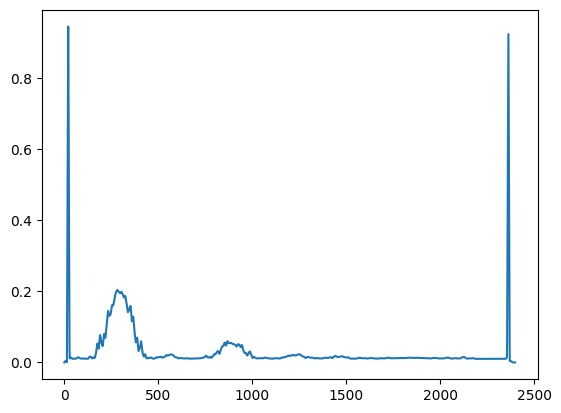

In [99]:
def image_to_vector(path):
    img = Image.open(path)
    img = np.array(img)
    # if img.shape[1]>600:
    #     raise ValueError("Image too large")
    # print(img[:,:,-1].mean())
    if img[:,:,-1].mean()<=254:
        raise ValueError("Image has transparency!")
    # img = img[img.shape[0]//2,10:-10,:].mean
    # img[np.abs(img[:,:,0]-img[:,:,2])<100]=125
    # img = img[:,:,0]-img[:,:,2]
    # return img
    img = img[:,:,2].mean(0)
    
    # img = img[10:-10]
    img = -img/img.max()
    img = img - img.min()
    # start = np.where(img[:15]>img[:15].max()*0.85)[0][-1]
    # end = np.where(img[-15:]>img[-15:].max()*0.85)[0][0]
    # end = - (30 - end)
    # print(start, end)
    # img = img[start+1:end]
    y = img
    # first, last = find_first_peak(y, "first"), find_first_peak(y, "last")
    # y = y[15:-15]
    x = np.arange(len(y))
    f = scipy.interpolate.interp1d(x,y,kind="linear",fill_value="extrapolate")
    new_x = np.linspace(0,img.shape[0],2400)
    # new_x[np.where(new_x>=img.shape[0])] = img.shape[0]
    # new_x[-1] = img.shape[0]-1
    new_y = f(new_x)
    new_y[np.where(new_y<0)] = 0 
    # new_y = new_y[100:-160]
    
    
    # re-scale the shape to 2400
    f = scipy.interpolate.interp1d(np.arange(len(new_y)),new_y,kind="linear",fill_value="extrapolate")
    new_y = f(np.linspace(0,len(new_y),2400))
    return new_y

filename = "ca"
parent_dirs = "SPEP_APR,SPEP_Hypoalb,SPEP_hypogamma,SPEP_Hypoprot,SPEP_MG,SPEP_NS,SPEP_PG,SPEP_WNL".split(",")
parent_dir = random.choice(parent_dirs)
while "ca" in filename.lower():
    filename = f"./data/{parent_dir}/" + random.choice(os.listdir(f"data/{parent_dir}/"))
print(filename)
# pylab.plot(np.abs(scipy.signal.convolve(image_to_vector(filename), np.array([-1,1]))))
pylab.plot(image_to_vector(filename))
    

In [27]:
list(image_to_vector(filename))

[0.0,
 0.09819379511734933,
 0.19638759023469865,
 0.2945813853520479,
 0.3927751804693973,
 0.4909689755867467,
 0.5891500668437906,
 0.6817106409424285,
 0.5856765273920773,
 0.4896424138417262,
 0.3936083002913749,
 0.2975741867410239,
 0.20154007319067274,
 0.10553325643304533,
 0.015070954881267813,
 0.015345525403068347,
 0.015620095924868882,
 0.015894666446669415,
 0.01616923696846995,
 0.01644380749027048,
 0.016717958079283207,
 0.016936959828456676,
 0.0165694997768928,
 0.016202039725328923,
 0.01583457967376505,
 0.015467119622201172,
 0.015099659570637296,
 0.014732632139192266,
 0.01440746560015238,
 0.01440746560015238,
 0.01440746560015238,
 0.01440746560015238,
 0.01440746560015238,
 0.01440746560015238,
 0.01440746560015238,
 0.01440746560015238,
 0.01440746560015238,
 0.01440746560015238,
 0.01440746560015238,
 0.01440746560015238,
 0.01440746560015238,
 0.01440746560015238,
 0.01440746560015238,
 0.01440746560015238,
 0.01440746560015238,
 0.01440746560015238,
 0.0

In [225]:
# loop through all dir and same them into array with folder name
x = []
y = []
filenames = []
for parent_dir in parent_dirs:
    for filename in os.listdir(f"data/{parent_dir}/"):
        if "ca" in filename.lower():
            continue
        try:
            x.append(image_to_vector(f"data/{parent_dir}/{filename}"))
            y.append(parent_dir)
            filenames.append(f"{parent_dir}/{filename}")
        except:
            pass

2 -18
4 -20
4 -18
3 -20
3 -21
3 -19
1 -18
3 -20
3 -20
12 -18
3 -16
3 -19
4 -21
3 -20
4 -20
5 -20
3 -17
2 -19
2 -20
2 -19
1 -21
3 -20
2 -19
3 -22
3 -19
3 -18
4 -16
2 -19
3 -20
3 -20
3 -20
14 -20
0 -18
2 -21
2 -19
3 -20
2 -19
4 -19
3 -30
3 -20
3 -24
3 -19
0 -17
3 -17
2 -18
3 -21
3 -19
2 -19
5 -21
2 -18
2 -19
3 -17
3 -19
3 -20
4 -18
3 -21
3 -19
3 -20
2 -17
4 -19
2 -18
4 -21
2 -21
4 -19
3 -20
2 -18
5 -23
3 -19
2 -20
3 -20
1 -19
14 -16
3 -20
14 -18
1 -18
3 -21
2 -20
5 -23
2 -17
4 -20
4 -19
1 -20
2 -24
2 -19
3 -22
2 -18
4 -17
1 -20
2 -21
3 -26
4 -18
1 -19
2 -24
3 -19
1 -18
3 -19
14 -19
4 -18
2 -17
3 -19
2 -18
2 -19
1 -18
2 -20
4 -25
1 -20
6 -24
3 -19
2 -19
3 -20
3 -20
3 -18
3 -23
2 -19
3 -19
4 -18
1 -20
3 -19
1 -22
3 -17
4 -22
3 -18
4 -20
4 -19
1 -20
2 -19
0 -18
2 -20
4 -20
4 -21
3 -21
3 -26
2 -18
2 -18
3 -18
2 -21
4 -20
4 -19
3 -19
1 -19
4 -18
6 -19
1 -18
5 -19
0 -16
2 -19
5 -18
3 -18
0 -19
1 -20
2 -21
2 -19
10 -19
2 -20
1 -20
1 -18
4 -27
2 -19
3 -21
2 -19
2 -18
3 -19
3 -22
3 -20
2 -20
4 -1

In [5]:
filenames[64]

'SPEP_Hypoalb/180285363_180823.png'

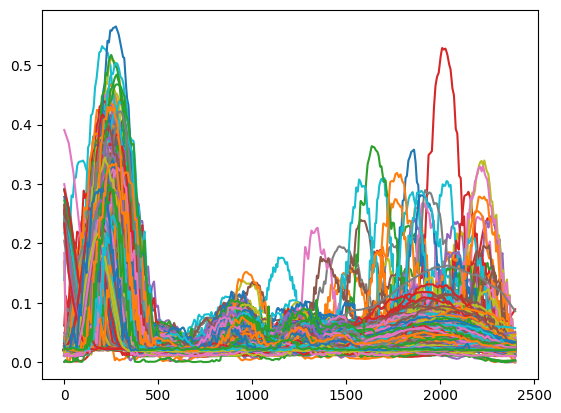

In [226]:
pylab.plot(np.array(x).T)
pylab.show()

In [7]:
import pickle
data = {"x":x, "y":y, "filenames":filenames}
with open("data.pkl", "wb") as f:
    pickle.dump(data, f)

In [8]:
# load from pickle
import pickle
with open("data.pkl", "rb") as f:
    data = pickle.load(f)
x,y,filenames = data["x"], data["y"], data["filenames"]

In [227]:
import torch.nn as nn
import json
import torch 

with open("../config.json","r") as f:
    config = json.load(f)
config["BS"] = 1
config["K"] = 64
class BaseModel(nn.Module):
        def __init__(self, pred):
            super().__init__()
            self.bert = torch.nn.TransformerEncoder(torch.nn.TransformerEncoderLayer(config["dim"], config["nhead"], batch_first=True), 
                                                    num_layers=config["N"],
                                                    norm=nn.LayerNorm(config["dim"]),
            )
            self.embeding = torch.nn.Linear(24, config["dim"])
            self.proj = nn.Sequential(
                nn.Linear(config["dim"], 2*config["dim"]),
                nn.BatchNorm1d(2*config["dim"]),
                nn.GELU(),
                nn.Linear(2*config["dim"], 4*config["dim"]),
                nn.BatchNorm1d(4*config["dim"]),
                nn.GELU(),
                nn.Linear(4*config["dim"], config["dim"]),
                nn.BatchNorm1d(config["dim"]),
                nn.GELU(),
            )
            
            self.pred = nn.Sequential(
                nn.Linear(config["dim"], 2*config["dim"]),
                nn.BatchNorm1d(2*config["dim"]),
                nn.GELU(),
                nn.Linear(2*config["dim"], 4*config["dim"]),
                nn.BatchNorm1d(4*config["dim"]),
                nn.GELU(),
                nn.Linear(4*config["dim"], config["dim"])
            ) if pred else nn.Identity()
            
            self.head = nn.Linear(config["dim"], config["K"])
            self.pos = torch.nn.Embedding(config["dots"]//24+2, config["dim"])
            self.cls = torch.nn.Parameter(torch.tensor(1.))
            self.norm = nn.BatchNorm1d(config["dim"])
            
        def forward(self, x):
            x = x.reshape(-1, config["dots"]//24, 24)
            mask = x.mean(dim=-1) <= x.mean()/config["snr"]
            x = self.embeding(x)
            # x = torch.nn.functional.normalize(x, dim=-1)
            # print("x shape", x.shape, self.cls.repeat(config["BS"], 1, 1).shape)
            x = torch.cat([torch.zeros(config["BS"], 1, config["dim"]).to(self.cls.device), x], dim=1)
            pos = self.pos(torch.arange(x.shape[1]).to(self.cls.device).repeat(x.shape[0],1))
            # pos = torch.nn.functional.normalize(self.pos(torch.arange(x.shape[1]).to(self.cls.device).repeat(x.shape[0],1)), dim=-1)
            x = x + pos
            if config["mask_noise"]:
                mask = torch.cat([torch.zeros((config["BS"], 1)).to(self.cls.device), mask], dim=1).to(torch.bool)
            else:
                mask = torch.zeros((config["BS"], config["dots"]//24+1)).to(self.cls.device).to(torch.bool)
            assert (x.shape == (config["BS"], config["dots"]//24+1, config["dim"]))
            x = self.bert(x, src_key_padding_mask=mask)[:,0,:]
            x = self.norm(x)
            return self.head(self.pred(self.proj(x)))       

In [228]:
import sys
sys.path.append("../")
config["N"] = 8
import moco.builder
model = moco.builder.MoCo(
    BaseModel,
    64,
    65536,
    0.99,
    0.08, 
    True,
)
model = model.train(True)
model = torch.nn.DataParallel(model)
mod = torch.load("../checkpoint_0020.pth.tar")
model.load_state_dict(mod["state_dict"]) 

model = model.module.encoder_q

In [229]:
import torch
import sklearn
config["BS"] = 1
# model = torch.load("../../checkpoint_0045.pth.tar")
model = model.train(False).to("cuda:0")
model.pred = torch.nn.Identity()
model.head = torch.nn.Identity()
def embed(x):
    # return torch.rand(32)
    return model(x.to(torch.float32).to("cuda:0").unsqueeze(0)).squeeze(0)  
embeddings = [embed(torch.tensor(x)).detach().cpu().numpy() for x in data["x"]]
embeddings = np.array(embeddings)
# turn y into labels
labels = list(set(data["y"]))
y = [labels.index(i) for i in data["y"]]

# shuffle x and y
indices = np.arange(len(x))
np.random.shuffle(indices)
x = np.array(x)[indices]
y = np.array(y)[indices]
embeddings = embeddings[indices]

In [230]:
# k-fold logistic regression on embeding with y 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

kf = KFold(n_splits=10)
for train_index, test_index in kf.split(embeddings):
    x_train, x_test = embeddings[train_index], embeddings[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = LogisticRegression(solver="saga", max_iter=1000).fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test, y_pred))

0.49019607843137253
0.6372549019607843
0.5784313725490197
0.48514851485148514
0.5445544554455446
0.5148514851485149


KeyboardInterrupt: 

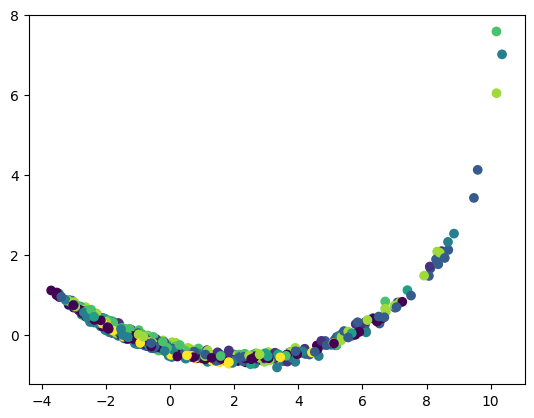

In [231]:
# pca visulize embeding with label
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(embeddings)
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=y)

In [232]:
# fine tune the whole model
import torch.optim as optim
model = model.train(True)
model = model.to("cuda:0")
config["BS"] = 32
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()
# model = model.module.encoder_q
model.pred = nn.Linear(config["dim"], len(labels)).to("cuda:0")
model.head = nn.Identity()

x_train = torch.tensor(x).to(torch.float32).to("cuda:0")[:-100]
y_train = torch.tensor(y).to("cuda:0")[:-100]
x_test = torch.tensor(x).to(torch.float32).to("cuda:0")[-100:]
y_test = torch.tensor(y).to("cuda:0")[-100:]

for epoch in range(100):
    running_loss = 0.0
    for i in range(0, len(x_train)-config["BS"], config["BS"]):
        
        optimizer.zero_grad()
        x_batch = (x_train[i:i+config["BS"]]).to(torch.float32).to("cuda:0")
        y_batch = (y_train[i:i+config["BS"]]).to("cuda:0")
        outputs = model(x_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    # print(running_loss/(len(x_train)//config["BS"]))
    config["BS"] = x_test.shape[0]
    outputs = model(x_test)
    _, predicted = torch.max(outputs, 1)
    print(accuracy_score(y_test.cpu(), predicted.cpu()))

/home/wg25r/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0.37
0.42
0.48
0.53
0.57
0.54
0.56
0.57
0.62
0.62
0.63
0.64
0.59
0.58
0.62
0.64
0.63
0.63
0.64
0.58
0.59
0.6
0.61
0.61
0.61
0.64
0.6


KeyboardInterrupt: 

In [ ]:
# test


0.68
